In [1]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

#directory = r'\Users\Emil\Desktop\Drones Raw RF Data'


In [2]:
Drones = {0:'00000',1:'10000',2:'10001',3:'10010',4:'10011',
         5:'10100',6:'10101',7:'10110',8:'10111',9:'11000'}

M = 2048
L = 1e5
Q = 9

In [23]:

for k  in range(10):
    flag = 1
    if Drones[k] == '00000':
        N = 41
    elif Drones[k] == '10111':
        N = 18
    else:
        N = 21
    data = []
    count = 1
    for j in range (N):
        print(Drones[k]+'L_'+str(j)+'.csv')
        x =np.loadtxt(Drones[k]+'L_'+str(j)+'.csv', delimiter=",")
        y =np.loadtxt(Drones[k]+'H_'+str(j)+'.csv', delimiter=",")
        
        factor = int(len(x)/L)

        for i  in range(1,factor+1):
            start = int(1 + (i-1)*L)
            finish = int(i*L)
    
            xf = abs(np.fft.fftshift(fft(x[start:finish]-np.mean(x[start:finish]),M)))
            end_xf=xf.shape[0]
            xf=xf[int(end_xf/2):end_xf]

            yf = abs(np.fft.fftshift(fft(y[start:finish]-np.mean(y[start:finish]),M)))
            end_yf=yf.shape[0]
            yf=yf[int(end_yf/2):end_yf]
            normalisation_factor = np.divide((np.mean(xf[-Q-1:-1])),np.mean(yf[0:Q]))
            yf = yf*normalisation_factor
    
            xf = np.transpose(xf)
            yf = np.transpose(yf)
            xf_yf = np.r_[xf,yf]
    
            if flag == 1:
                data = xf_yf
                flag = 0
            else:
                data = np.c_[data,xf_yf]

                
        print(int(100*j/N))
        print(data.shape)
    Data=np.square(data)
    save=np.savetxt(Drones[k]+'_FFT_power.csv',Data,delimiter=',')
    print("Saving" +' ' + Drones[k])
    
        

    

00000L_0.csv
0
(2048, 100)
00000L_1.csv
2
(2048, 200)
00000L_2.csv
4
(2048, 300)
00000L_3.csv
7
(2048, 400)
00000L_4.csv
9
(2048, 500)
00000L_5.csv
12
(2048, 600)
00000L_6.csv
14
(2048, 700)
00000L_7.csv
17
(2048, 800)
00000L_8.csv
19
(2048, 900)
00000L_9.csv
21
(2048, 1000)
00000L_10.csv
24
(2048, 1100)
00000L_11.csv
26
(2048, 1200)
00000L_12.csv
29
(2048, 1300)
00000L_13.csv
31
(2048, 1400)
00000L_14.csv
34
(2048, 1500)
00000L_15.csv
36
(2048, 1600)
00000L_16.csv
39
(2048, 1700)
00000L_17.csv
41
(2048, 1800)
00000L_18.csv
43
(2048, 1900)
00000L_19.csv
46
(2048, 2000)
00000L_20.csv
48
(2048, 2100)
00000L_21.csv
51
(2048, 2200)
00000L_22.csv
53
(2048, 2300)
00000L_23.csv
56
(2048, 2400)
00000L_24.csv
58
(2048, 2500)
00000L_25.csv
60
(2048, 2600)
00000L_26.csv
63
(2048, 2700)
00000L_27.csv
65
(2048, 2800)
00000L_28.csv
68
(2048, 2900)
00000L_29.csv
70
(2048, 3000)
00000L_30.csv
73
(2048, 3100)
00000L_31.csv
75
(2048, 3200)
00000L_32.csv
78
(2048, 3300)
00000L_33.csv
80
(2048, 3400)
0000

In [3]:
data = []
count = 1

N = 1
x =np.loadtxt('00000L_0.csv', delimiter=",")
y =np.loadtxt('00000H_0.csv', delimiter=",")

In [12]:
factor = int(len(x)/L)

for i  in range(1,factor+1):
    start = int(1 + (i-1)*L)
    finish = int(i*L)
    
    xf = abs(np.fft.fftshift(fft(x[start:finish]-np.mean(x[start:finish]),M)))
    end_xf=xf.shape[0]
    xf=xf[int(end_xf/2):end_xf]

    yf = abs(np.fft.fftshift(fft(y[start:finish]-np.mean(y[start:finish]),M)))
    end_yf=yf.shape[0]
    yf=yf[int(end_yf/2):end_yf]
    normalisation_factor = np.divide((np.mean(xf[-Q-1:-1])),np.mean(yf[0:Q]))
    yf = yf*normalisation_factor
    
    xf = np.transpose(xf)
    yf = np.transpose(yf)
    xf_yf = np.r_[xf,yf]
    
    if i == 1:
        data = xf_yf
    else:
        data = np.c_[data,xf_yf]
    
    

In [15]:
data[:,80]

array([ 57.80076801,  29.23398405, 163.21745905, ..., 122.02330296,
        95.86681814,  15.76351559])

In [224]:
Data= np.square(data)

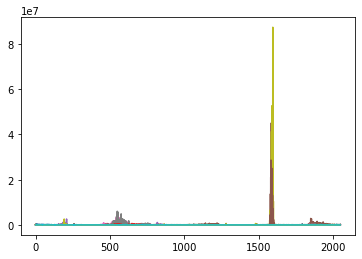

In [226]:
plt.plot(Data)